In [1]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import pandas as pn
import Clustering

# K-Means

## Generador de muestras

### Condiciones:
Definimos el número de clusters que se generarán, el número máximo de iteraciones y el número de muestras o datos que se generarán

In [2]:
n_clusters = 3
max_iterations = 50
n_samples = 400

Se definen aleatoriamente los centroides reales de los clusters

In [3]:
true_centroid = [[ rn.uniform(-10,10)  for i in range(0, n_clusters)], [rn.uniform(-10,10)  for i in range(0, n_clusters)]]
print(true_centroid)

[[-1.8873462462944968, -5.701599205253949, -3.530783828008115], [-9.912407634273903, 8.68593220880786, 9.776295675744695]]


Generamos los n datos de acuerdo a la condición 'n_samples'. Estos datos se generan aleatoriamente alrededor de cada centroide.

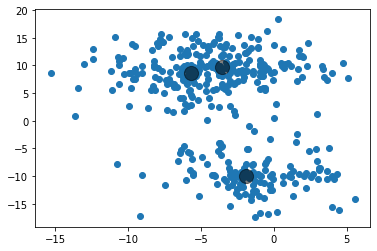

In [4]:
ndata = n_samples//n_clusters
datax = []
datay = []
for j in range(n_clusters):  
    for i in range(0, ndata):  
        datax.append(true_centroid[0][j]+rn.random()*rn.uniform(-10,10) )
        datay.append(true_centroid[1][j]+rn.random()*rn.uniform(-10,10) )
data = [datax, datay]
plt.scatter(data[0][:], data[1][:])
plt.scatter(true_centroid[0][:], true_centroid[1][:], c='black', s=200, alpha=0.5)

## Algoritmo de K-Means

El objetivo es clasificar todos los datos en clusters. Para ello es necesario crear n centroides ubicados aleatoriamente. Posteriormente se debe de obtener un vector para cada dato y centroide, con ello obtenemos la distancia mínima de cada dato y centroide, para guardar ese punto en el cluster con el centroide más cercano. 
Posteriormente se calcula el centro de cada cluster y se redefine el centroide y el proceso anterior se repite hasta alcanzar las n interaciones máximas.

En la siguiente función se crea cada cluster vacio y los n centroides ubicados aleatoriamente.

In [5]:
def create_clusters():
    clustersDic = {'cluster'+str(i): [] for i in range(n_clusters)}
    centroides = [[rn.uniform(np.min(data[0]),np.max(data[0])), rn.uniform(np.min(data[1]),np.max(data[1]))] for i in range(n_clusters)]
    return clustersDic, centroides

Definimos una función para calcular la distancia entre dos puntos.

In [6]:
def distance(point1, point2):
    distace = np.sqrt((point1[0]-point2[0])**2+(point1[1]-point2[1])**2)
    return distace

En la siguiente función se ingresa un cluster no vacío para encontrar el nuevo centroide de su conjunto de datos.

In [7]:
def findCentroid(clusters):
    centroids = []
    for points in clusters:
        points = np.array(points).T
        centroids.append([np.mean(points[0]), np.mean(points[1])])
    return centroids


Para cada iteración, los clusters se redefinen clasificando cada dato de acuerdo a un nuevo centroide.

In [8]:
def update_cluster(centroids):
    clustersDis = [[] for i in range(n_clusters)]
    for i in range(len(data[0])):
        dis = [distance([data[0][i],data[1][i]], centroids[j]) for j in range(n_clusters)]
        minDist = dis.index(np.min(dis))
        clustersDis[minDist].append([data[0][i],data[1][i]])
        clustersDis = np.array(clustersDis)
    centroids = findCentroid(clustersDis)
    return clustersDis, centroids

In [9]:
color = []
for i in range(n_clusters):
    color.append('#%06X' % rn.randint(0, 0xFFFFFF))

Finalmente se definen los clusters vacios y los centroides aleatorios y se comienza con los procesos iterativos de clasificación de datos y para encontrar el centroide más cercano al real.

C:\Users\baruc\AppData\Local\Temp\ipykernel_364\4039889107.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clustersDis = np.array(clustersDis)


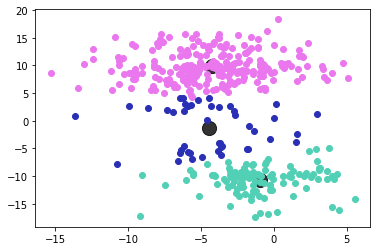

In [10]:
clusters, centroids = create_clusters()
for i in range(max_iterations):
     clusters, centroids = update_cluster(centroids)
for j in range(n_clusters):
    for point in clusters[j]:
        plt.plot(point[0],point[1],'o', color = color[j])
    plt.scatter(centroids[j][0], centroids[j][1], c='black', s=200, alpha=0.8)

In [11]:
import Clustering
fit = Clustering.k_means(data,3,50)
fit.main()

d:\Documentos\GitHub\K-means\Clustering.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clustersDis = np.array(clustersDis)


TypeError: findCentroid() takes 1 positional argument but 2 were given